<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/LR_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
read_file = pd.read_csv (r'kc_house_price.txt')
read_file.to_csv (r'data.csv', index=None)
df=pd.read_csv (r'data.csv')
df=df[['price','sqft_living','bedrooms']]

In [6]:
df.info

<bound method DataFrame.info of           price  sqft_living  bedrooms
0      221900.0         1180         3
1      538000.0         2570         3
2      180000.0          770         2
3      604000.0         1960         4
4      510000.0         1680         3
...         ...          ...       ...
21592  360000.0         1530         3
21593  400000.0         2310         4
21594  402101.0         1020         2
21595  400000.0         1600         3
21596  325000.0         1020         2

[21597 rows x 3 columns]>

In [7]:
#eliminate outliers
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [8]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f99abc43150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99abc43bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99abcb7ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99abc4a6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99abcb7050>],
 'means': []}

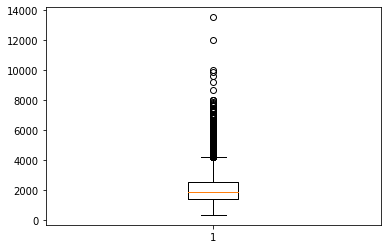

In [9]:
plt.boxplot(df['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f99ab9e13d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99ab9e1e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99ab9dadd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99ab9e9950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99ab9e9e90>],
 'means': []}

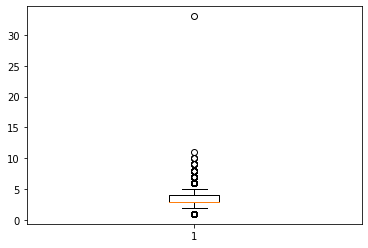

In [10]:
plt.boxplot(df['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f99ab6a1890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99ab6a6350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99ab6a12d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99ab6a6e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99ab6b0390>],
 'means': []}

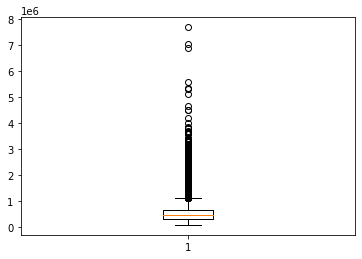

In [11]:
plt.boxplot(df['price'])

In [14]:
def list_of_data_of_outliers(q25,q75,col_name):
  intr_qr = q75-q25
  max = q75+(3*intr_qr)
  min = q25-(3*intr_qr)
  l2=np.where(df[col_name]>max)
  l1=np.where(df[col_name]<min)
  return np.union1d(l2,l1)
def union(l1,l2):
  return np.union1d(l1,l2)

In [15]:
a=df['bedrooms'].quantile([0.25,0.5,0.75]).to_list()
b=df['sqft_living'].quantile([0.25,0.5,0.75]).to_list()
c=df['price'].quantile([0.25,0.5,0.75]).to_list()

a1=list_of_data_of_outliers(a[0],a[2],'bedrooms')
b1=list_of_data_of_outliers(b[0],b[2],'sqft_living')
c1=list_of_data_of_outliers(c[0],c[2],'price')

d=union(a1,b1)
total=union(d,c1)


In [16]:
df_new=df.drop(total,axis=0)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21132 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21132 non-null  float64
 1   sqft_living  21132 non-null  int64  
 2   bedrooms     21132 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 660.4 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7f99ab4c1cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99ab4c7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99ab4c16d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99ab4cd290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99ab4cd7d0>],
 'means': []}

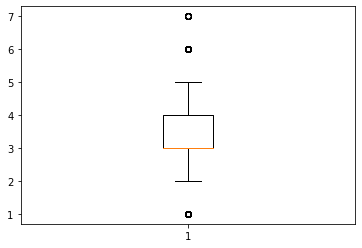

In [18]:
plt.boxplot(df_new['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f99ab4b1b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99ab4b8610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99ab4b1590>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99ab440110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99ab440650>],
 'means': []}

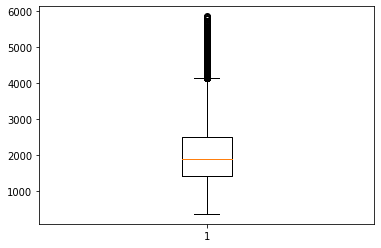

In [19]:
plt.boxplot(df_new['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f99ab4233d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99ab423e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99ab41bdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99ab42a950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99ab42ae90>],
 'means': []}

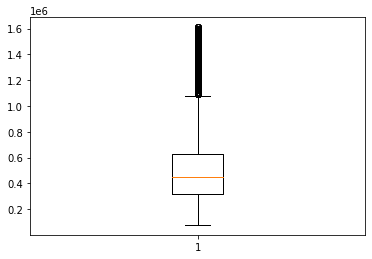

In [20]:
plt.boxplot(df_new['price'])

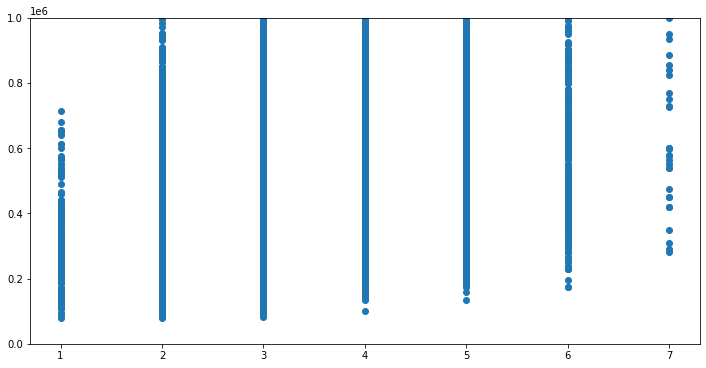

In [21]:
fig = plt.figure(figsize=(12,6))
plt.ylim([0,1000000])
plt.scatter(x=df_new['bedrooms'],y=df_new['price'])

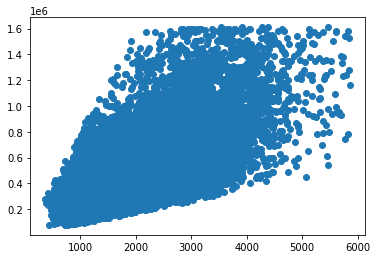

In [22]:
plt.scatter(x=df_new['sqft_living'],y=df_new['price'])

In [23]:
corr_matrix = df_new.corr()
print(corr_matrix)

                price  sqft_living  bedrooms
price        1.000000     0.660260  0.316256
sqft_living  0.660260     1.000000  0.599836
bedrooms     0.316256     0.599836  1.000000


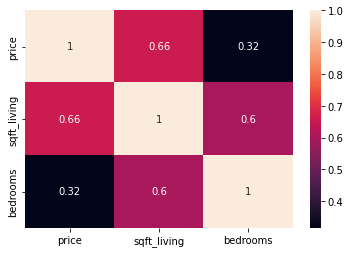

In [24]:
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)
plt.show()

(array([ 219., 1464., 3105., 3278., 3120., 2357., 2023., 1502., 1126.,
         854.,  612.,  404.,  239.,  183.,  139.,  166.,  108.,   96.,
          63.,   74.]),
 array([  78000.,  154600.,  231200.,  307800.,  384400.,  461000.,
         537600.,  614200.,  690800.,  767400.,  844000.,  920600.,
         997200., 1073800., 1150400., 1227000., 1303600., 1380200.,
        1456800., 1533400., 1610000.]),
 <a list of 20 Patch objects>)

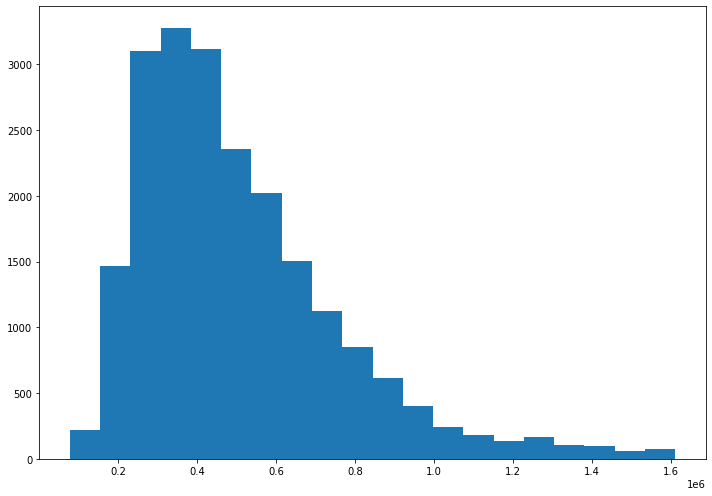

In [25]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(df_new['price'], bins = 20)

(array([  79.,  891., 2025., 2869., 3149., 2770., 2538., 1971., 1541.,
        1060.,  806.,  537.,  348.,  217.,  149.,   82.,   33.,   25.,
          22.,   20.]),
 array([ 370. ,  644.5,  919. , 1193.5, 1468. , 1742.5, 2017. , 2291.5,
        2566. , 2840.5, 3115. , 3389.5, 3664. , 3938.5, 4213. , 4487.5,
        4762. , 5036.5, 5311. , 5585.5, 5860. ]),
 <a list of 20 Patch objects>)

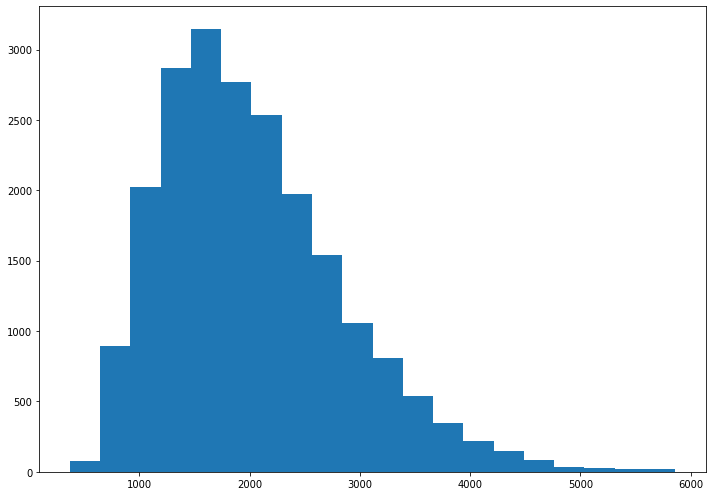

In [26]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['sqft_living'], bins = 20)

(array([ 196.,    0.,    0., 2756.,    0.,    0., 9751.,    0.,    0.,
           0., 6674.,    0.,    0., 1480.,    0.,    0.,  245.,    0.,
           0.,   30.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6,
        4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <a list of 20 Patch objects>)

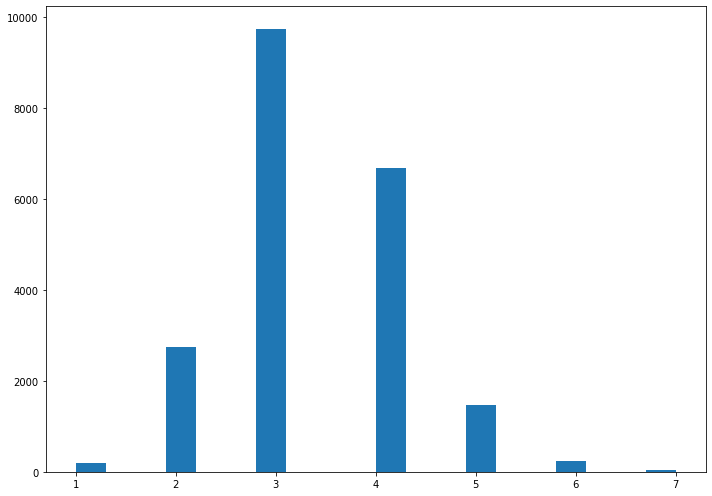

In [27]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['bedrooms'], bins = 20)

In [28]:
df_for_train=df_new.to_numpy()
print(df_for_train)

[[2.21900e+05 1.18000e+03 3.00000e+00]
 [5.38000e+05 2.57000e+03 3.00000e+00]
 [1.80000e+05 7.70000e+02 2.00000e+00]
 ...
 [4.02101e+05 1.02000e+03 2.00000e+00]
 [4.00000e+05 1.60000e+03 3.00000e+00]
 [3.25000e+05 1.02000e+03 2.00000e+00]]


In [29]:
df_for_train.shape

(21132, 3)

In [108]:
from sklearn.preprocessing import StandardScaler
def standardized(dataset):
    scaler = StandardScaler()
    scaler.fit(dataset)
    dataset = scaler.transform(dataset)
    return dataset
    

In [104]:
t=standardized(df_for_train)
X=t[:,[1,2]]
y=t[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
X=df_for_train[:,[1,2]]
y=df_for_train[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [109]:
x=standardized(df_for_train[:,[1,2]])


In [110]:
X=x
y=df_for_train[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Coefficients:  [   228.14225161 -36919.63115976]
Variance score: 0.4502488900747643


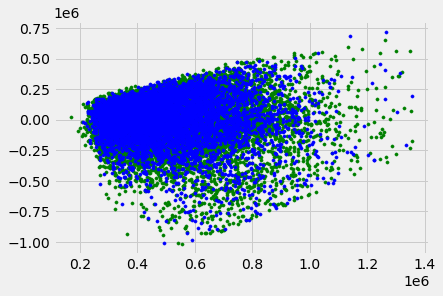

In [31]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')